<a href="https://colab.research.google.com/github/zrcjessica/ml_concepts/blob/main/python_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Here, I will implement a very simple feed forward neural network without using any deep learning libraries (e.g. PyTorch, Tensorflow). This exercise is helpful for ensuring understanding the fundamental elements of a simple neural network. This exercise is adapted from an excellent post by [Andrew Trask](http://iamtrask.github.io/2015/07/12/basic-python-network/).

# Input data
We will work with a simple set of binary  ($\{0,1\}$) input and output data. We have four examples where the inputs are a vector of three values and the output is a single value. 

| Input 	| Output 	|
|-------	|--------	|
| 0,0,1 	| 0      	|
| 1,1,1 	| 1      	|
| 1,0,1 	| 1      	|
| 0,1,1 	| 0      	|

# Task

## Learn
The **goal** is to predict the correct output given an input vector. From observing the dataset, we can see that the output appears to be 1 whenever the first value of the input vector is also 1. The job of the neural network will be to identify that pattern.

## Predict
We will also try to make a prediction on a new test data point, where the input vector is $\{1, 0, 0\}$ and the corresponding output should be $1$.

# The neural network
Our simple neural network will simply pass the inputs through a single neuron with a sigmoid activation function to return an output between $0$ and $1$. The neural network architecture can be visualized as follows:
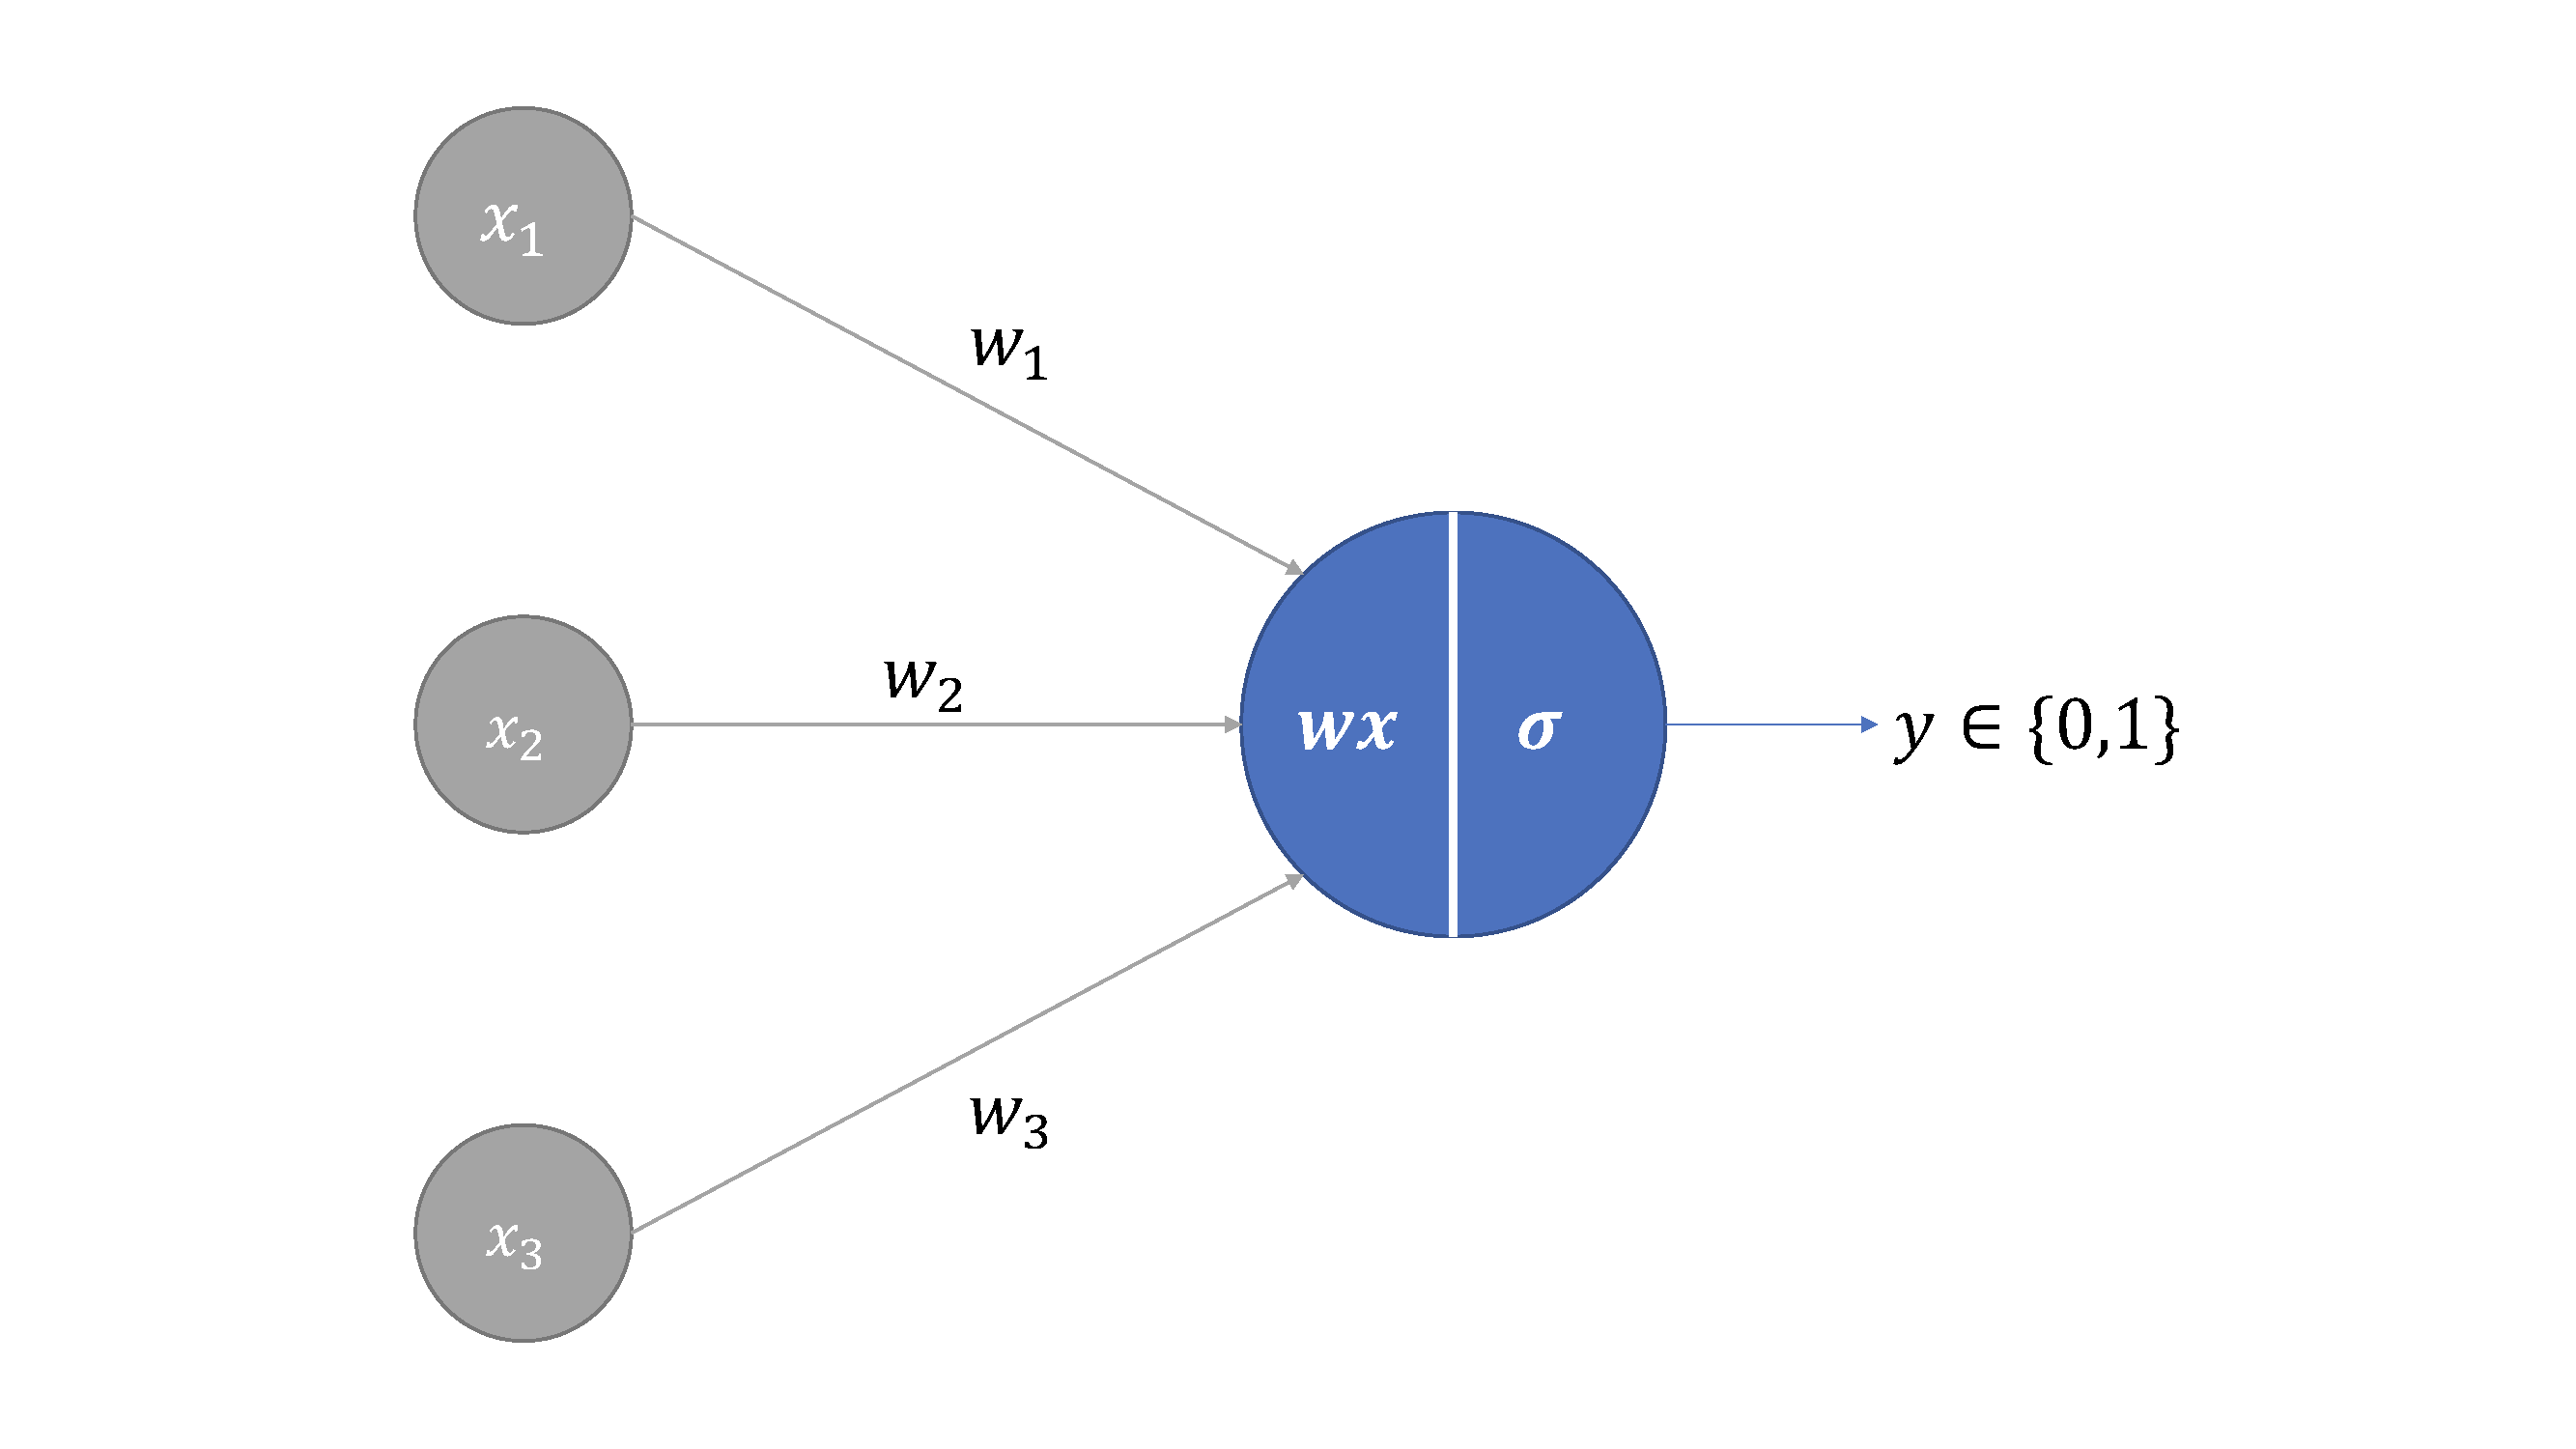

# Forward propagation
To train our neural network, each input row of our table will be passed through the neural network for training and multiplied by the hidden weights in the network to yield a dot product, or weighted sum ($s = Σw_i x_i = w_1 x_1 + w_2 x_2 + w_3 x_3$), which will be passed to a sigmoid activation function to produce an output, $\hat{y} = σ(s)$. We will repeat this for $n$ training iterations.

## Initializing weights
The weights are the parameters of our neural network, which will be tuned over the course of training to achieve optimal predictions. We will start by initializing these with very small values (for simplicity's sake, we will generate random values with a mean of 0).

## Activation function
We will be using a sigmoid activation function, which is defined as $σ(x)=\frac{1}{1+e^{-x}}$. Sigmoid functions are popular because they yield an output between 0 and 1 and are also easily differentiable as $σ^\prime (x)=x(1-x)$. The derivative is important for the backpropagation step of this neural network, which is used to update the weights in each iteration of the training process. 

# Back propagation

# Calculating the erorr
During each iteration of training, we will receive predictions for each sample (row) in the training data. From this, we can measure the error of the prediction given the current weights as the difference between the prediction and the true output value and then use this information to update the weights. We will use a simple squared error loss function, where:
$$
E=Σ\frac{1}{2}(y-\hat{y})^2
$$
We include the $\frac{1}{2}$ so that when we differentiate the loss function later during the back propagation step, the exponent will cancel out with the fraction for ease. 
<!-- Thus, for a given sample, the error $E$ is:
$$E=y-\hat{y}$$
where $y$ is the true output value.  -->

## Updating the weights - gradient descent
The magnitude of the error will let us know by how much, and in which direction, we need to adjust the current weights in our network to achieve more accurate predictions. We know that output in $L_1$ is calculated as $\hat{y}=σ(s)$. However, we want to adjust the weights, $\mathbf{w}$, in response to the size of the error ($E$) between the true and predicted output values. In other words, __how does the error change as the weights change__? 

###  
We can start by looking at a specific example, $w_1$. The change in error $E$ with respect to $w_1$ can be expressed as the following partial derivative:

$$\frac{∂E}{\partial w_1} = \frac{∂E}{\partial \hat{y}} \frac{\partial \hat{y}}{∂ s} \frac{\partial s}{\partial w_1}$$

This expression results from the application of the Chain Rule: the value of $E$ is a function of $\hat{y}$; the value of $\hat{y}$ is a function of $s$; and the value of $s$ is a function of $w_1$.

The partial derivative of $E$ with respect to $\hat{y}$ can be expressed as:
$$
\frac{\partial E}{\partial \hat{y}} = 2*\frac{1}{2}(y-\hat{y})^{2-1}*-1 = \hat{y}-y
$$

The partial derivative of $\hat{y}$ with respect to $s$ can be expressed as:
$$
\frac{\partial \hat{y}}{\partial s} =  σ^\prime (\hat{y}) = \hat{y}(1-\hat{y})
$$

Finally, the partial derivative of $s$ with respect to $w_1$ can be expressed as:
$$
\frac{\partial s}{\partial w_1} = x_1
$$

Thus, the partial derivative of $E$ with respect to $w_1$ can be expressed as:

$$\frac{∂E}{\partial w_1} = (\hat{y}-y)* \hat{y}(1-\hat{y})*x_1$$

Therefore, for a given training iteration $j$, we will generate an updated value of $w_{1_{j+1}}$ by subtracting $\frac{∂E}{\partial w_1}$ from the value of $w$ from the current iteration ($w_{1_j}$). The value of $\frac{∂E}{\partial w_1} $ is the quantity by which we update $w$. 

### Summing over a batch
During each iteration of our training loop, we will evaluate all four samples (this is known as **batch gradient descent**). How do we integrate data from the four samples in one batch to make a single update to each value of $w$? For a given weight $w_i$, an input value at the corresponding position $x_i$ will yield a different quantity for updating $w_i$. That is, each sample will yield a unique value of $\frac{∂E}{\partial w_i}$. We will simply sum the values obtained across all samples for each $w_{i_j}$ to obtain a single update quantity $w_{i_{j+1}}$. We will implement this by programming everything in a vectorized manner. 

# Implementation

Now we will work on implementing this simple neural network with the provided training data using no other python libraries besides numpy! 

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# random seed for reproducibility
np.random.seed(1)

In [127]:
class SimpleNN():
    """
    initialize a simple feed-forward two layer neural network:
    - input layer (L1) of variable size
    - output layer (L2) of fixed size (1)
    """

    def __init__(self, input_size = 3):
        """
        initialize weights and declare input size
        """
        self.input_size = input_size
        self.weights = 2*np.random.random((input_size,1)) - 1

    def __sigmoid(self, weighted_sum):
        """
        sigmoid function that takes as input weighted sum of weights and inputs
        """
        return 1/(1+np.exp(-weighted_sum))
    
    def __gradient(self, x):
        """
        computes derivative of sigmoid function for a given value of x
        """
        return x*(1-x)

    def __accuracy(self, pred, target):
        """
        given true and predicted outputs, calculate accuracy
        """

        # convert predicted values to 0 or 1
        pred_bin = np.where(pred>0.5, 1, 0)
        accuracy = (pred_bin == target).sum()/target.shape[0]
        return accuracy

    def train(self, trainX,  trainY, iters = 1000, verbose = False):
        """
        function for training neural network on training data
        """
        accuracy = []

        for iter in range(iters):
            ### feed forward ###
            
            # calculate weighted sum
            s = np.dot(trainX, self.weights)
            
            # predict yhat
            yhat = self.__sigmoid(s)

            ### backprop ###

            # calculate error b/w trainY and yhat
            err = trainY - yhat 

            # gradient descent
            grad = np.dot(trainX.T, (yhat - trainY)*self.__gradient(yhat))
            
            # update weights
            self.weights -= grad

            # calculate accuracy 
            accu_iter = self.__accuracy(yhat, trainY)
            accuracy.append(accu_iter)

            if verbose:
                if iter%100 == 0 or iter == 0:
                    print("iter %d" % iter)
                    print("output")
                    print(yhat)
                    print("accuracy = %.2f\n" % accu_iter)
            

        print("output after training:")
        print(yhat)
        self.accuracy = accuracy
    
    def pred(self, testX):
        """
        given a previously unseen set of input data, predict output
        """
        # calculate weighted sum of inputs and weights
        s = np.dot(testX, self.weights)

        # predict yhat
        yhat = self.__sigmoid(s)

        return yhat




We'll start by initializing our neural network and checking out its starting weights.

In [128]:
nn = SimpleNN(3)

print("starting weights")
print(nn.weights)

starting weights
[[-0.01685368]
 [-0.89327491]
 [ 0.14823521]]


Now let's load in the training data as numpy arrays.

In [129]:
X = np.array([[0,0,1],
              [1,1,1],
              [1,0,1],
              [0,1,1]])

In [130]:
y = np.array([[0,1,1,0]]).T

Now we'll train the neural network over 1,000 training iterations! 

In [131]:
nn.train(X, y)

output after training:
[[0.03200438]
 [0.97401833]
 [0.97917864]
 [0.02567942]]


What are the weights after training and how have they changed from the initial weights?

In [132]:
nn.weights

array([[ 7.2611713 ],
       [-0.22668066],
       [-3.40990665]])

Let's visualize the accuracy over each training iteration.

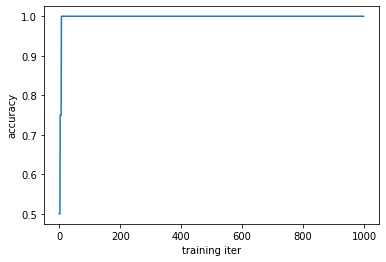

In [133]:
plt.plot(nn.accuracy)
plt.xlabel('training iter')
plt.ylabel('accuracy')
plt.show()

Now let's predict on the test data point, where the input vector is $\{1, 0, 0\}$ and the corresponding output should be $1$.

In [126]:
testX = np.array([1,0,0])
testY = 1

nn.pred(testX, testY)

array([0.99993705])